In [1]:
import uproot, numpy as np, pandas as pd

# f = '/data/jlai/iris-hep/OutputETA_pt_20/output_eta_-2.5/measurements.root'
f = '/data/jlai/iris-hep/OutputPT/output_pt_100/measurements.root'
file = uproot.open(f)
t = file["measurements"]

cols = ["volume_id","layer_id","surface_id","true_x","true_y","true_z",
        "var_loc0","var_loc1","residual_loc0","residual_loc1","pull_loc0","pull_loc1"]
a = t.arrays(cols, library="pd")

a["R"] = np.sqrt(a.true_x**2 + a.true_y**2)
a["absZ"] = a.true_z.abs()

a["sigma_loc0"] = np.sqrt(a.var_loc0.clip(lower=0))
a["sigma_loc1"] = np.sqrt(a.var_loc1.clip(lower=0))

g = a.groupby(["volume_id","layer_id"])

layer_table = pd.DataFrame({
    "R_mean": g["R"].median(),
    "Z_abs_mean": g["absZ"].median(),
    "sigma_loc0_med": g["sigma_loc0"].median(),
    "sigma_loc1_med": g["sigma_loc1"].median(),
    "resid0_RMS": g["residual_loc0"].std(ddof=0),
    "resid1_RMS": g["residual_loc1"].std(ddof=0),
    "pull0_RMS": g["pull_loc0"].std(ddof=0),
    "pull1_RMS": g["pull_loc1"].std(ddof=0),
    "n_hits": g.size()
}).reset_index()

layer_table

,volume_id,layer_id,R_mean,Z_abs_mean,sigma_loc0_med,sigma_loc1_med,resid0_RMS,resid1_RMS,pull0_RMS,pull1_RMS,n_hits
0,17,2,32.212929,37.245613,0.015,0.015,0.014784,0.014760,0.985587,0.983987,128331
1,17,4,68.193146,37.335930,0.015,0.015,0.014797,0.014755,0.986447,0.983663,123258
2,17,6,114.205826,37.294235,0.015,0.015,0.014778,0.014780,0.985217,0.985338,119694
3,17,8,170.204300,37.239487,0.015,0.015,0.014789,0.014844,0.985904,0.989614,120565
4,24,2,259.954590,37.016605,0.043,1.200,0.042583,1.182068,0.990295,0.985057,115281
5,24,4,359.975616,37.046463,0.043,1.200,0.042295,1.177363,0.983610,0.981135,116824
6,24,6,499.986694,37.030014,0.043,1.200,0.042398,1.177433,0.985994,0.981194,117118
7,24,8,659.995117,37.002434,0.043,1.200,0.042304,1.175602,0.983811,0.979669,116101
8,29,2,820.244812,37.000656,0.072,NaN,0.070905,NaN,0.984785,NaN,219934
9,29,4,1020.187439,37.079819,0.072,NaN,0.070893,NaN,0.984625,NaN,235390


In [3]:
a["residual_loc1"].std(ddof=0)

np.float32(0.8214976)

In [33]:
f = '/data/jlai/iris-hep/OutputETA_pt_20/output_eta_-2.5/tracksummary_ckf.root'
# f = '/data/jlai/iris-hep/OutputPT/output_pt_10/measurements.root'
file = uproot.open(f)
t = file["tracksummary"]
t.keys()
# t.arrays(['measurementVolume'], library="np")

['event_nr',
 'track_nr',
 'nStates',
 'nMeasurements',
 'nOutliers',
 'nHoles',
 'nSharedHits',
 'chi2Sum',
 'NDF',
 'measurementChi2',
 'outlierChi2',
 'measurementVolume',
 'measurementLayer',
 'outlierVolume',
 'outlierLayer',
 'nMajorityHits',
 'majorityParticleId',
 'trackClassification',
 't_charge',
 't_time',
 't_vx',
 't_vy',
 't_vz',
 't_px',
 't_py',
 't_pz',
 't_theta',
 't_phi',
 't_eta',
 't_p',
 't_pT',
 't_d0',
 't_z0',
 't_prodR',
 'hasFittedParams',
 'eLOC0_fit',
 'eLOC1_fit',
 'ePHI_fit',
 'eTHETA_fit',
 'eQOP_fit',
 'eT_fit',
 'err_eLOC0_fit',
 'err_eLOC1_fit',
 'err_ePHI_fit',
 'err_eTHETA_fit',
 'err_eQOP_fit',
 'err_eT_fit',
 'res_eLOC0_fit',
 'res_eLOC1_fit',
 'res_ePHI_fit',
 'res_eTHETA_fit',
 'res_eQOP_fit',
 'res_eT_fit',
 'res_ePT_fit',
 'res_ePTrel_fit',
 'pull_eLOC0_fit',
 'pull_eLOC1_fit',
 'pull_ePHI_fit',
 'pull_eTHETA_fit',
 'pull_eQOP_fit',
 'pull_eT_fit',
 'cov_eLOC0_eLOC0',
 'cov_eLOC0_eLOC1',
 'cov_eLOC0_ePHI',
 'cov_eLOC0_eTHETA',
 'cov_eLOC0_eQ

In [44]:
# root_path = "/data/jlai/iris-hep/OutputETA_pt_20/output_eta_-2.5/tracksummary_ckf.root"
root_path = "/data/jlai/iris-hep/OutputPT_pixel_only/output_pt_100/tracksummary_ckf.root"
tree_name = "tracksummary"
branch = ["measurementVolume", "nMeasurements", "nOutliers", "nHoles"]   # vector<int> per event/track

# --- read as awkward (preferred) ---
with uproot.open(root_path) as f:
    t = f[tree_name]
    arr = t.arrays(branch, library="ak")

In [51]:
arr["event_nr"]

<Array [4, 69, 19, 44, ..., 99995, 99997, 99998, 99999] type='100000 * uint32'>

In [53]:
import uproot, awkward as ak, numpy as np
import matplotlib.pyplot as plt

B = 2.0  # Tesla (change to your setup)
K = 0.3  # GeV->(T·m) factor

# --- pick one event/track from tracksummary ---
ts = uproot.open("/data/jlai/iris-hep/OutputPT_pixel_only/output_pt_10/tracksummary_ckf.root")["tracksummary"]
arr = ts.arrays(["event_nr","track_nr","t_px","t_py","t_pz","t_vx","t_vy","t_vz","t_charge"], library="ak")

# choose first good track as demo
ev  = int(arr["event_nr"][0])
px,py,pz = map(float, (arr["t_px"][0][0], arr["t_py"][0][0], arr["t_pz"][0][0]))
vx,vy,vz = map(float, (arr["t_vx"][0][0], arr["t_vy"][0][0], arr["t_vz"][0][0]))
q        = int(arr["t_charge"][0][0])

pT  = np.hypot(px,py)
R   = pT/(K*B*abs(q))     # helix radius (meters if p in GeV, B in T); convert to mm if you plot in mm
Rmm = R*1000.0

phi0 = np.arctan2(py,px)
omega = (K*B*q)/pT        # signed curvature (1/m) in xy
lam   = pz/pT             # dz/ds slope

# center of helix in xy
xc = vx + Rmm*np.sin(phi0)
yc = vy - Rmm*np.cos(phi0)

# parametric helix points (arc length s in mm)
s = np.linspace(0, 3000, 2000)       # tweak range/step to cover your tracker
phi = phi0 + omega*(s/1000.0)        # omega in 1/m, s in mm -> convert to m
x = xc - Rmm*np.sin(phi)
y = yc + Rmm*np.cos(phi)
z = vz + lam*s

# overlay hits from hits.root for the same event (optional)
hits = uproot.open("/data/jlai/iris-hep/OutputPT_pixel_only/output_pt_10/hits.root")["hits"]
harr = hits.arrays(["event_nr","global_x","global_y","global_z"], library="ak")
mask = (harr["event_nr"] == ev)
hx, hy, hz = (np.array(harr["global_x"][mask][0]),
              np.array(harr["global_y"][mask][0]),
              np.array(harr["global_z"][mask][0]))

# plots
plt.figure(); plt.plot(x,y); plt.scatter(hx,hy,s=5); plt.xlabel("x [mm]"); plt.ylabel("y [mm]"); plt.axis("equal"); plt.title("XY view");
plt.figure(); plt.plot(z, np.hypot(x,y)); plt.scatter(hz, np.hypot(hx,hy), s=5); plt.xlabel("z [mm]"); plt.ylabel("r [mm]"); plt.title("rz view");
plt.show()


KeyInFileError: not found: 'event_nr'
in file /data/jlai/iris-hep/OutputPT_pixel_only/output_pt_10/hits.root
in object /hits;2

In [54]:
hits.keys()

['event_id',
 'geometry_id',
 'particle_id',
 'tx',
 'ty',
 'tz',
 'tt',
 'tpx',
 'tpy',
 'tpz',
 'te',
 'deltapx',
 'deltapy',
 'deltapz',
 'deltae',
 'index',
 'volume_id',
 'boundary_id',
 'layer_id',
 'approach_id',
 'sensitive_id']

In [58]:
arr["event_id"][0]

np.uint32(4)

/tmp/ipykernel_3726767/2581438189.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20")


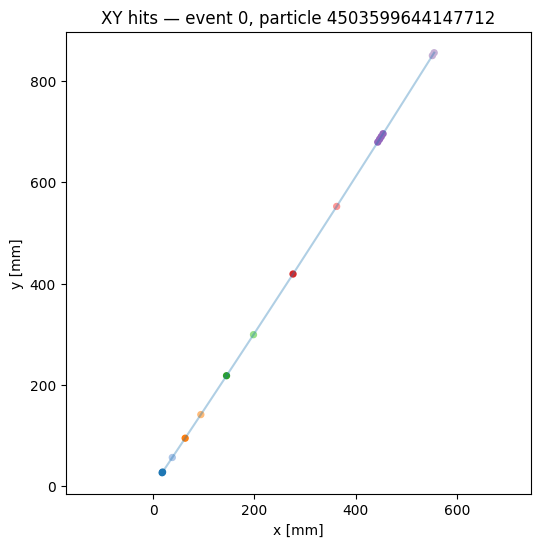

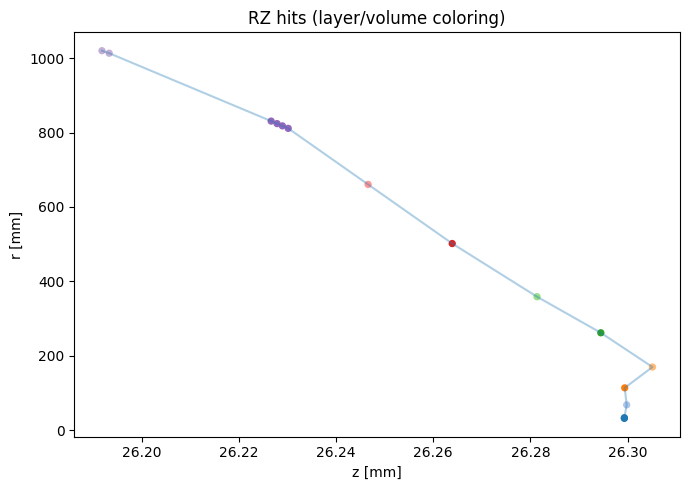

Event 0, particle 4503599644147712: 15 hits
Unique (volume,layer) crossed: [[17  2]
 [17  4]
 [17  6]
 [17  8]
 [24  2]
 [24  4]
 [24  6]
 [24  8]
 [29  2]
 [29  4]]


In [70]:
hits = uproot.open("/data/jlai/iris-hep/OutputETA_pt_20/output_eta_0.0/hits.root")["hits"]

arr = hits.arrays(
    ["event_id","particle_id","tx","ty","tz","tt","tpx","tpy","tpz",
     "volume_id","layer_id","sensitive_id"],
    library="ak"
)

# ---- pick first event & first particle robustly (no ak.unique) ----
events = np.unique(ak.to_numpy(arr["event_id"]))
if len(events) == 0:
    raise RuntimeError("No events found in hits.root")

evt = int(events[0])
mask_evt = (arr["event_id"] == evt)
evt_hits = arr[mask_evt]

pids = np.unique(ak.to_numpy(evt_hits["particle_id"]))
if len(pids) == 0:
    raise RuntimeError(f"No particles found in event {evt}")

pid = int(pids[0])
sel = mask_evt & (arr["particle_id"] == pid)
h = arr[sel]

# flatten to NumPy (this selection should be 1D already; ak.to_numpy is safe)
x = np.asarray(ak.to_numpy(h["tx"]), dtype=float)
y = np.asarray(ak.to_numpy(h["ty"]), dtype=float)
z = np.asarray(ak.to_numpy(h["tz"]), dtype=float)
r = np.hypot(x, y)

vol = np.asarray(ak.to_numpy(h["volume_id"]), dtype=int)
lay = np.asarray(ak.to_numpy(h["layer_id"]), dtype=int)

if x.size == 0:
    raise RuntimeError(f"Selected event {evt}, particle {pid} has no hits")

# ---- order hits along a simple path-length proxy ----
s = np.sqrt(r**2 + z**2)
order = np.argsort(s)
x,y,z,r,vol,lay = x[order], y[order], z[order], r[order], vol[order], lay[order]

# ---- color by (volume, layer) ----
pairs = np.stack([vol, lay], axis=1)
uniq_pairs, inv = np.unique(pairs, axis=0, return_inverse=True)

import matplotlib.cm as cm
cmap = cm.get_cmap("tab20")
colors = [cmap(i % 20) for i in inv]

# ---- plots ----
plt.figure(figsize=(6,6))
plt.scatter(x, y, c=colors, s=18)
plt.plot(x, y, alpha=0.35)
plt.axis("equal"); plt.xlabel("x [mm]"); plt.ylabel("y [mm]")
plt.title(f"XY hits — event {evt}, particle {pid}")

plt.figure(figsize=(7,5))
plt.scatter(z, r, c=colors, s=18)
plt.plot(z, r, alpha=0.35)
plt.xlabel("z [mm]"); plt.ylabel("r [mm]")
plt.title("RZ hits (layer/volume coloring)")
plt.tight_layout()
plt.show()

print(f"Event {evt}, particle {pid}: {len(x)} hits")
print("Unique (volume,layer) crossed:", uniq_pairs)


(array([8.5890e+03, 0.0000e+00, 0.0000e+00, 9.0824e+04, 0.0000e+00,
        0.0000e+00, 3.1500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.7700e+02, 0.0000e+00, 0.0000e+00, 5.7000e+01, 0.0000e+00,
        0.0000e+00, 2.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+01, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. ]),
 <BarContainer object of 40 artists>)

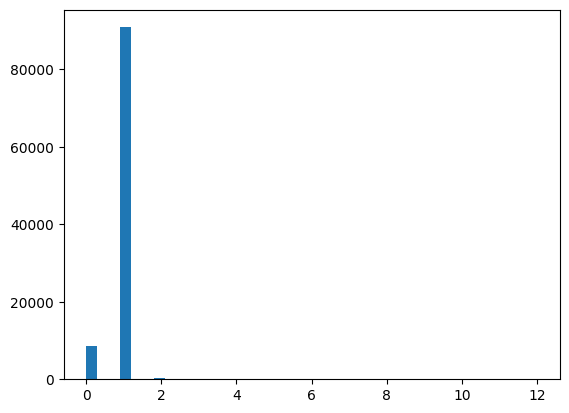

In [26]:
plt.hist(ak.num(vec), bins=40)

In [13]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- inputs ---
root_path = "/data/jlai/iris-hep/OutputETA_pt_20/output_eta_-2.5/tracksummary_ckf.root"
tree_name = "tracksummary"
branch = "measurementVolume"   # vector<int> per event/track

# --- read as awkward (preferred) ---
with uproot.open(root_path) as f:
    t = f[tree_name]
    arr = t.arrays([branch], library="ak")

vec = arr[branch]                     # jagged array, e.g. [[23,23,16,...], [], [17,17,...], ...]
# number of unique values per event (empty event -> 0)
unique_counts = ak.num(np.unique(vec, axis=-1), axis=-1)
unique_counts_np = ak.to_numpy(unique_counts)

# quick summary
print("Total events:", len(unique_counts_np))
print("Min/Max unique per event:", unique_counts_np.min(), unique_counts_np.max())
print("Counts by multiplicity:")
vals, freqs = np.unique(unique_counts_np, return_counts=True)
for v, n in zip(vals, freqs):
    print(f"  {v:2d} -> {n}")

# histogram (includes empty sets because those give 0)
bins = np.arange(unique_counts_np.max() + 2)  # 0..max, +1 edge
plt.figure()
plt.hist(unique_counts_np, bins=bins, edgecolor="black")
plt.xlabel("# unique numbers in measurementVolume (per event)")
plt.ylabel("Events")
plt.title("Distribution of unique counts per event")
plt.tight_layout()

out = Path("unique_measurementVolume_counts.png")
plt.savefig(out, dpi=150)
print(f"Saved histogram to: {out.resolve()}")


ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-47/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

In [1]:
import uproot, numpy as np, pandas as pd


f = '/data/jlai/iris-hep/output10/measurements.root'
file = uproot.open(f)
t = file["measurements"]

cols = ["volume_id","layer_id","true_x","true_y","true_z",
        "var_loc0","var_loc1","residual_loc0","residual_loc1","pull_loc0","pull_loc1"]
a = t.arrays(cols, library="pd")

a["R"] = np.sqrt(a.true_x**2 + a.true_y**2)
a["absZ"] = a.true_z.abs()

a["sigma_loc0"] = np.sqrt(a.var_loc0.clip(lower=0))
a["sigma_loc1"] = np.sqrt(a.var_loc1.clip(lower=0))

g = a.groupby(["volume_id","layer_id"])

layer_table = pd.DataFrame({
    "R_mean": g["R"].mean(),
    "Z_abs_mean": g["absZ"].median(),
    "sigma_loc0_med": g["sigma_loc0"].median(),
    "sigma_loc1_med": g["sigma_loc1"].median(),
    "resid0_RMS": g["residual_loc0"].std(ddof=0),
    "resid1_RMS": g["residual_loc1"].std(ddof=0),
    "pull0_RMS": g["pull_loc0"].std(ddof=0),
    "pull1_RMS": g["pull_loc1"].std(ddof=0),
    "n_hits": g.size()
}).reset_index()

layer_table

,volume_id,layer_id,R_mean,Z_abs_mean,sigma_loc0_med,sigma_loc1_med,resid0_RMS,resid1_RMS,pull0_RMS,pull1_RMS,n_hits
0,17,2,32.549679,39.242565,0.015,0.015,0.014675,0.014880,0.978304,0.991985,1275
1,17,4,68.387070,40.354538,0.015,0.015,0.014535,0.014830,0.969021,0.988688,1256
2,17,6,114.308823,38.899483,0.015,0.015,0.014902,0.014547,0.993482,0.969806,1198
3,17,8,170.270691,40.229809,0.015,0.015,0.014615,0.014873,0.974309,0.991509,1191
4,24,2,260.296204,39.176304,0.043,1.200,0.042515,1.190648,0.988726,0.992207,1139
5,24,4,360.281158,39.242565,0.043,1.200,0.040747,1.174737,0.947607,0.978947,1161
6,24,6,500.171082,40.229809,0.043,1.200,0.041613,1.159507,0.967738,0.966256,1157
7,24,8,660.154663,39.766781,0.043,1.200,0.042198,1.202641,0.981345,1.002201,1141
8,29,2,820.480835,39.815109,0.072,NaN,0.069028,NaN,0.958726,NaN,2174
9,29,4,1020.202698,39.242565,0.072,NaN,0.071452,NaN,0.992393,NaN,2305


In [19]:
for i in range(4):
    print(0, layer_table.resid0_RMS[i]*0.001, layer_table.resid1_RMS[i]*0.001, layer_table.R_mean[i]* 0.001)

0 1.4785486e-05 1.4759221e-05 0.032542057
0 1.4800092e-05 1.47561905e-05 0.06837143
0 1.4776128e-05 1.47877245e-05 0.11430968
0 1.4797782e-05 1.4840902e-05 0.17027566


In [ ]:
                "bins": 336,
                "max": 8.4,
                "min": -8.4,
                "option": "open",
                "type": "equidistant",
                "value": "binX"
              },
              {
                "bins": 1440,
                "max": 36.0,
                "min": -36.0,

In [4]:
8.4*2 / 336

0.05

In [5]:
0.05/np.sqrt(12)

np.float64(0.014433756729740645)